In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Model Preprocessing

In [2]:
advise = pd.read_csv('datasets/Advertising.csv', index_col=0)
advise.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<Axes: xlabel='newspaper', ylabel='sales'>

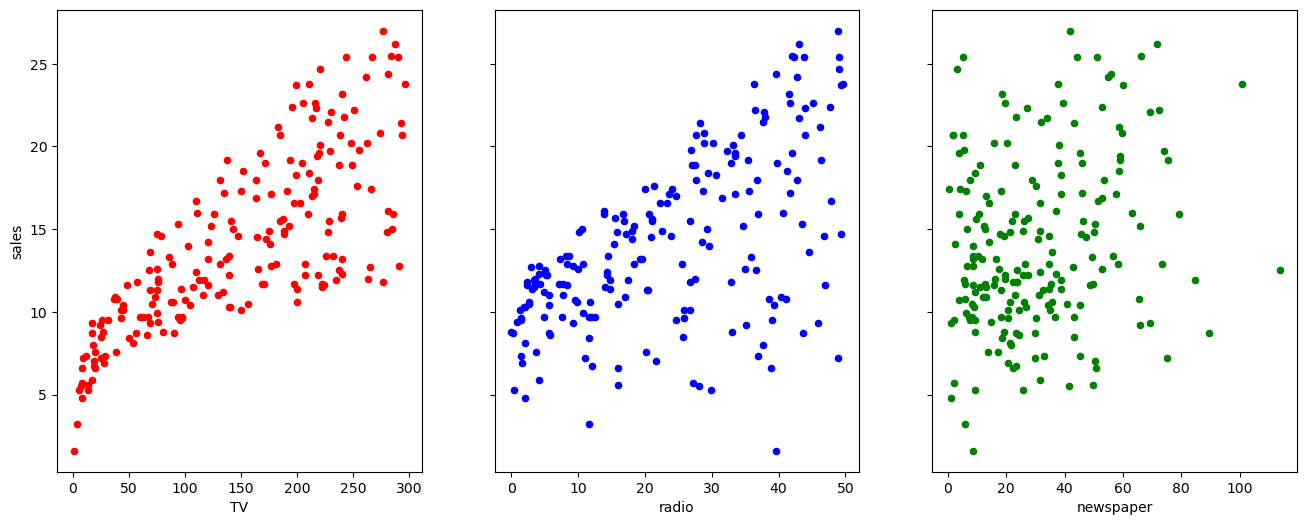

In [3]:
# create scatter plot between TV, Radio and Sales to see the relationship with Sales
fig, axs = plt.subplots(1, 3, sharey=True)
advise.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 6), color='r')
advise.plot(kind='scatter', x='radio', y='sales', ax=axs[1], color='b')
advise.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2], color='g')

## Modeling with sklearn

[LinearRegression](https://scikit-learn.org/1.5/modules/linear_model.html) uses Ordinary Least Squares as its cost function

Step 1: importing the necessary libraries 


In [4]:
# import the linear regression model from sklearn
from  sklearn.linear_model import LinearRegression

Step 2: split X and y

In [5]:
# Create the X and y
X = advise[['TV']]
y = advise['sales']

Step 3: create instance of linear regression model

In [6]:
# Create the model
lin_reg = LinearRegression()

Step 4: Using the given data to fit the model (training process)

In [7]:
# Fit the model
lin_reg.fit(X, y)

LinearRegression()

Step 5: Predict the coeffcient/parameters of the model

In [8]:
# Print the coefficients
print(lin_reg.coef_, lin_reg.intercept_)

[0.04753664] 7.032593549127693


Step 6: Making prediction

In [9]:
# Predict the values
y_pred = lin_reg.predict(X)

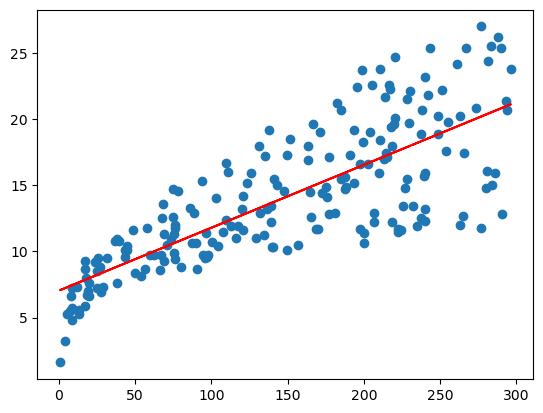

In [10]:
# Plot the data
plt.scatter(X, y)

# draw the regression line
plt.plot(X, y_pred, color='red');

Step 7: Evaluate the model's performance

In [11]:
# RMSE

np.sqrt(np.mean((y - y_pred) ** 2))


3.2423221486546887

In [12]:
# output the model prediction accuracy

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_squared_error(y, y_pred))
print(mean_absolute_error(y, y_pred))
print(r2_score(y, y_pred))

# RMSE
print(np.sqrt(mean_squared_error(y, y_pred)))

10.512652915656757
2.549806038927486
0.611875050850071
3.2423221486546887


## Modeling with statsmodels

There are two ways: see reference [here](https://www.statsmodels.org/stable/api.html)

* `statsmodels.formula.api`: A convenience interface for specifying models using **formula strings** and DataFrames, 
*  `statsmodels.api`

### Using `statsmodels.formula.api`

Canonically imported using `import statsmodels.formula.api as smf`

In [13]:
import statsmodels.formula.api as smf

In [14]:
# Fit the model
smf_ols_model = smf.ols(formula='sales ~ TV', data=advise).fit()

# Print the summary
print(smf_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.47e-42
Time:                        12:00:20   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [15]:
smf_ols_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [16]:
# make prediction
y_pred_smf = smf_ols_model.predict(X)

# RMSE
np.sqrt(np.mean((y - y_pred_smf) ** 2))


3.2423221486546887

In [19]:
smf_ols_model.get_prediction(X).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,17.970775,0.320991,17.337774,18.603775,11.513546,24.428003
1,9.147974,0.359466,8.439101,9.856848,2.682867,15.613081
2,7.850224,0.418501,7.024932,8.675515,1.371318,14.329129
3,14.234395,0.230734,13.779384,14.689405,7.792179,20.676611
4,15.627218,0.247677,15.138794,16.115642,9.182556,22.071880
...,...,...,...,...,...,...
195,8.848493,0.372635,8.113651,9.583336,2.380487,15.316500
196,11.510545,0.270756,10.976609,12.044481,5.062274,17.958816
197,15.446579,0.244113,14.965184,15.927974,9.002446,21.890712
198,20.513985,0.433698,19.658726,21.369244,14.031194,26.996776


### Using `statsmodels.api`

Canonically imported using `import statsmodels.api as sm`

In [64]:
import statsmodels.api as sm

In [65]:
# Create the X and y
X = advise[['TV']]
y = advise['sales']

In [ ]:
# Fit the model
sm_ols_model = sm.OLS(y, X).fit()

# Print the summary
print(sm_ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Mon, 13 Jan 2025   Prob (F-statistic):                   3.52e-100
Time:                        08:01:07   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Difference between two APIs

The difference is due to the presence of intercept or not:

* in `statsmodels.formula.api`, a constant is automatically added to your data and an intercept in fitted
* in `statsmodels.api`, you have to add a constant yourself. Try using `add_constant` from `statsmodels.api`

Let's add the constant

In [68]:
# add a constant to the model
X = sm.add_constant(X)

# Fit the model
sm_ols_constant_model = sm.OLS(y, X).fit()

# Print the summary
print(sm_ols_constant_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           1.47e-42
Time:                        08:08:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [69]:
# print the parameters
sm_ols_constant_model.params

const    7.032594
TV       0.047537
dtype: float64

**Key Takeaways**

- The three models yield identical parameter values and performance metrics.
- Using `sklearn`, we can assess the model's accuracy by importing metrics from the library.
- `statsmodels` provides additional statistical insights, such as confidence intervals and p-values, which indicate the uncertainty in the estimates

In [6]:
# read the insurance data
insurance = pd.read_csv('datasets/insurance_data.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
# using the bmi as the single predictor variable
X = insurance[['bmi']]
y = insurance['charges']



In [8]:
# import the linear regression model from sklearn
from  sklearn.linear_model import LinearRegression

# Create the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X, y)

# Print the coefficients
print(lin_reg.coef_, lin_reg.intercept_)

[393.8730308] 1192.9372089611552


In [9]:
# Predict the values
y_pred = lin_reg.predict(X)

# rmse
np.sqrt(np.mean((y - y_pred) ** 2))

11864.986308399499

In [10]:
# import statsmodels.formula.api as smf

import statsmodels.formula.api as smf

# Fit the model
smf_ols_model = smf.ols(formula='charges ~ bmi', data=insurance).fit()

# Print the summary
print(smf_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Mon, 13 Jan 2025   Prob (F-statistic):           2.46e-13
Time:                        09:28:28   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.4